In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1n9268qSj_5Q7KS_ntpv-wFPQC1UyJh6f -O aerofit.csv

--2024-03-13 15:53:23--  https://drive.google.com/uc?id=1n9268qSj_5Q7KS_ntpv-wFPQC1UyJh6f
Resolving drive.google.com (drive.google.com)... 172.217.7.46, 2607:f8b0:4025:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.7.46|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1n9268qSj_5Q7KS_ntpv-wFPQC1UyJh6f [following]
--2024-03-13 15:53:23--  https://drive.usercontent.google.com/download?id=1n9268qSj_5Q7KS_ntpv-wFPQC1UyJh6f
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.12.1, 2607:f8b0:4025:815::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.12.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7461 (7.3K) [application/octet-stream]
Saving to: ‘aerofit.csv’

aerofit.csv         100%[===================>]   7.29K  --.-KB/s    in 0s      

2024-03-13 15:53:23 (38.7 MB/s) - ‘aerofit.csv’ saved 

In [ ]:
df_aerofit = pd.read_csv('/content/aerofit.csv')

In [ ]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df_aerofit["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

<Axes: xlabel='Product', ylabel='Income'>

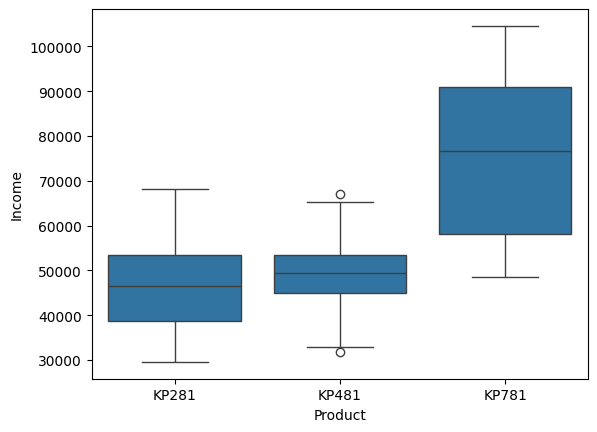

In [ ]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

In [ ]:
df_aerofit[df_aerofit['Product']== 'KP781']['Income'].mean()

75441.575

In [ ]:
df_aerofit[df_aerofit['Product']== 'KP481']['Income'].mean()

48973.65

In [ ]:
df_aerofit[df_aerofit['Product']== 'KP281']['Income'].mean()

46418.025

In [ ]:
np.random.seed(42)
df_aerofit["random_group"] = np.random.choice(["g1", "g2", "g3"],size=len(df_aerofit))

In [ ]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,random_group
0,KP281,18,Male,14,Single,3,4,29562,112,g3
1,KP281,19,Male,15,Single,2,3,31836,75,g1
2,KP281,19,Female,14,Partnered,4,3,30699,66,g3
3,KP281,19,Male,12,Single,3,3,32973,85,g3
4,KP281,20,Male,13,Partnered,4,2,35247,47,g1


<Axes: xlabel='random_group', ylabel='Income'>

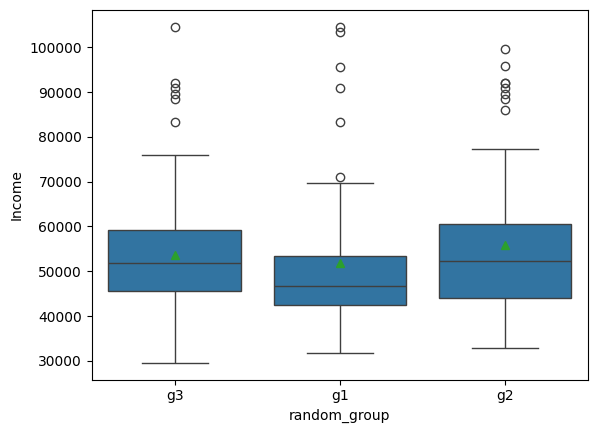

In [ ]:
sns.boxplot(x='random_group', y='Income', data=df_aerofit, showmeans = True)

In [1]:
from scipy.stats import f_oneway # Numeric Vs categorical for many categories

<Axes: xlabel='random_group', ylabel='Income'>

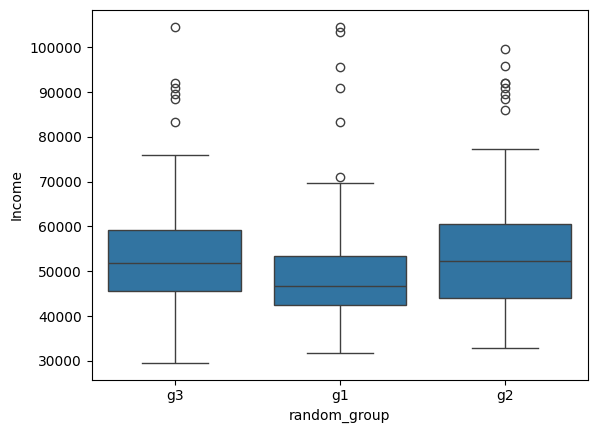

In [ ]:
sns.boxplot(x='random_group', y='Income', data=df_aerofit)

- Null hypothesis(): States that the means of all groups are equal.
- Alternate hypothesis(): States that at least one of the means is different.

Distribution is Normal

In [ ]:
income_g1 = df_aerofit[df_aerofit["random_group"]=="g1"]["Income"]
income_g2 = df_aerofit[df_aerofit["random_group"]=="g2"]["Income"]
income_g3 = df_aerofit[df_aerofit["random_group"]=="g3"]["Income"]

In [ ]:
income_g1.mean()

51840.44827586207

In [ ]:
income_g2.mean()

55812.69642857143

In [ ]:
income_g3.mean()

53594.954545454544

In [12]:
import numpy as np
algorithm_A = np.array([23, 25, 22, 27, 28, 24, 26, 29, 21, 30, 25, 43, 26, 28, 24, 22, 27, 46, 25, 29])

algorithm_B = np.array([31, 28, 29, 32, 30, 33, 27, 28, 32, 30, 31, 29, 30, 48, 33, 31, 29, 30, 32, 31])

algorithm_C = np.array([45, 43, 23, 49, 49, 8, 21, 20, 42, 40, 28, 46, 44, 37, 44, 38, 42, 34, 42, 40])

In [13]:
f_oneway(algorithm_A,algorithm_B,algorithm_C)

F_onewayResult(statistic=7.170867249960098, pvalue=0.0016677807792135901)

In [8]:
f_stats, p_value = f_oneway(income_g1, income_g2, income_g3)

print("test statistic:",f_stats)
print("p_value:",p_value)

NameError: name 'income_g1' is not defined

In [ ]:
if p_value < 0.05:
    print("Reject H0")
    print("Atleast one group have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Fail to reject H0
All groups have same mean


## Senario-2

<Axes: xlabel='Product', ylabel='Income'>

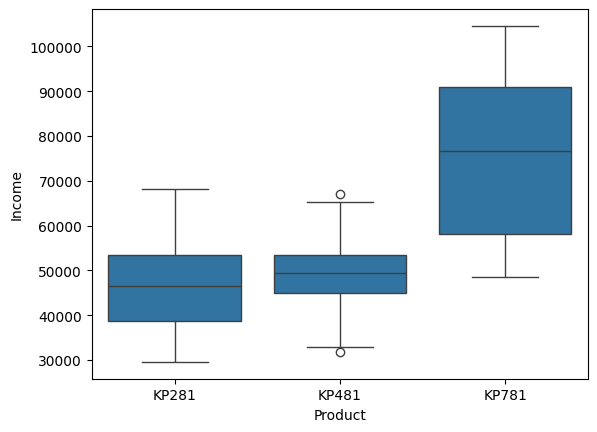

In [ ]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

In [ ]:
income_kp281 = df_aerofit[df_aerofit["Product"]=="KP281"]["Income"]
income_kp481 = df_aerofit[df_aerofit["Product"]=="KP481"]["Income"]
income_kp781 = df_aerofit[df_aerofit["Product"]=="KP781"]["Income"]

In [ ]:
income_kp281.mean()

46418.025

In [ ]:
income_kp481.mean()

48973.65

In [ ]:
income_kp781.mean()

75441.575

In [25]:
cars = [19.9, 15.3, 2.2, 6.8, 34.2, 8.3, 12.0, 7.0, 9.5, 1.1]
buses = [1.8, 24.6, 7.2, 37.0, 7.2, 21.2, 6.5, 23.6]
trucks = [13.3, 23.0, 25.4, 15.3, 57.1, 14.5, 26.0]

In [26]:
f_stats, p_value = f_oneway(cars, buses, trucks)

print("test statistic:",f_stats)
print("p_value:",p_value)

test statistic: 2.4686944536875277
p_value: 0.10782985675757563


In [ ]:
if p_value < 0.05:
    print("Reject H0")
    print("Atleast one group have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Reject H0
Atleast one group have different mean


## Method: 2 Sample T-test
Pairwise T-test

In [ ]:
from scipy.stats import ttest_ind # Numeric Vs categorical

In [ ]:
ttest_ind(income_kp281, income_kp781)

TtestResult(statistic=-11.551787854717519, pvalue=4.116508528877672e-21, df=118.0)

In [ ]:
#Ho: All means are the same
#Ha: Atleast one mean is differnt

t_stat, p_value = ttest_ind(income_kp281, income_kp781)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print('This means that we have enough evidence to conclude that the means of the two income product groups are statistically different from each other.')
else:
    print("Fail to reject H0")
    print('This means that we do not have enough evidence to conclude that the means of the two income product groups are statistically different from each other.')

p_value: 4.116508528877672e-21
Reject H0
This means that we have enough evidence to conclude that the means of the two income product groups are statistically different from each other.


In [ ]:
t_stat, p_value = ttest_ind(income_kp281, income_kp481)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print('This means that we have enough evidence to conclude that the means of the two income product groups are statistically different from each other.')
else:
    print("Fail to reject H0")
    print('This means that we do not have enough evidence to conclude that the means of the two income product groups are statistically different from each other.')

p_value: 0.09487529747264932
Fail to reject H0
This means that we do not have enough evidence to conclude that the means of the two income product groups are statistically different from each other.


In [ ]:
t_stat, p_value = ttest_ind(income_kp481, income_kp781)
print("p_value:",p_value)
if p_value < 0.05:
    print("Reject H0")
    print('This means that we have enough evidence to conclude that the means of the two income product groups are statistically different from each other.')
else:
    print("Fail to reject H0")
    print('This means that we do not have enough evidence to conclude that the means of the two income product groups are statistically different from each other.')

p_value: 7.770191623361236e-16
Reject H0
This means that we have enough evidence to conclude that the means of the two income product groups are statistically different from each other.


## QQ plot

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1v48RRtiivufSX4ewrMaxsADK73GnN2kI -O waiting_time.csv

--2024-03-13 17:25:43--  https://drive.google.com/uc?id=1v48RRtiivufSX4ewrMaxsADK73GnN2kI
Resolving drive.google.com (drive.google.com)... 172.217.7.46, 2607:f8b0:4025:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.7.46|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1v48RRtiivufSX4ewrMaxsADK73GnN2kI [following]
--2024-03-13 17:25:43--  https://drive.usercontent.google.com/download?id=1v48RRtiivufSX4ewrMaxsADK73GnN2kI
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.12.1, 2607:f8b0:4025:815::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.12.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1656272 (1.6M) [application/octet-stream]
Saving to: ‘waiting_time.csv’

waiting_time.csv    100%[===================>]   1.58M  --.-KB/s    in 0.1s    

2024-03-13 17:25:45 (11.9 MB/s) - ‘waiting_tim

In [ ]:
path = '/content/waiting_time.csv'
df_wt = pd.read_csv(path)

In [ ]:
df_wt.head()

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439


<Axes: xlabel='time', ylabel='Count'>

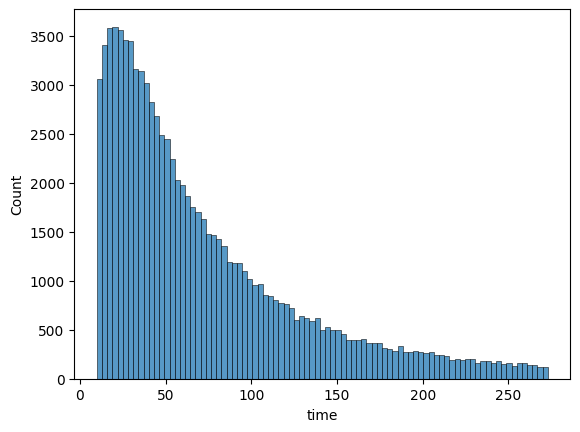

In [ ]:
sns.histplot(df_wt["time"])

In [ ]:
import statsmodels.api as sm

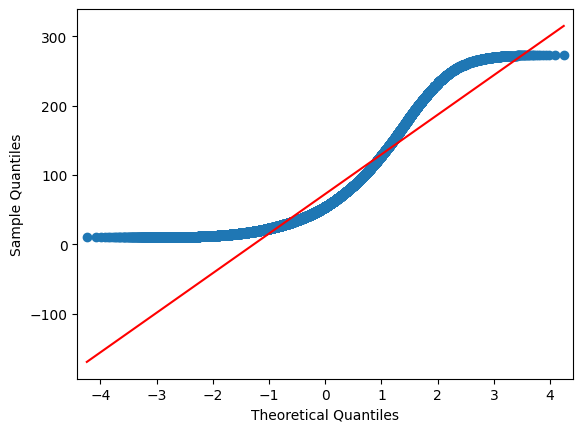

In [ ]:
sm.qqplot(df_wt["time"], line="s")
plt.show()

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb -O weight-height.csv

--2024-03-13 17:31:06--  https://drive.google.com/uc?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb
Resolving drive.google.com (drive.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb [following]
--2024-03-13 17:31:06--  https://drive.usercontent.google.com/download?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.12.1, 2607:f8b0:4025:815::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.12.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [application/octet-stream]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.09s   

2024-03-13 17:31:07 (4.58 MB/s) - ‘weight-he

In [ ]:
path = '/content/weight-height.csv'
df_hw = pd.read_csv(path)

In [ ]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
height = df_hw["Height"]

<Axes: xlabel='Height', ylabel='Count'>

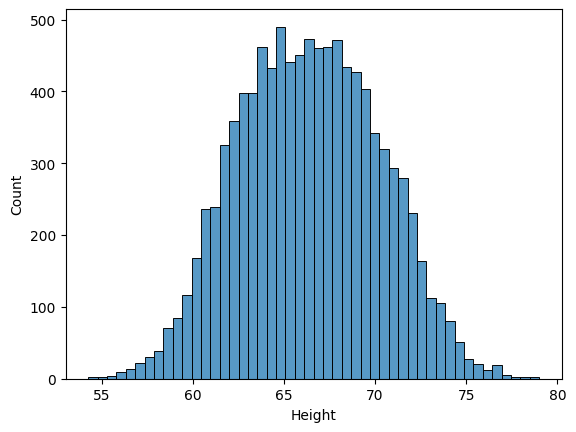

In [ ]:
sns.histplot(height)

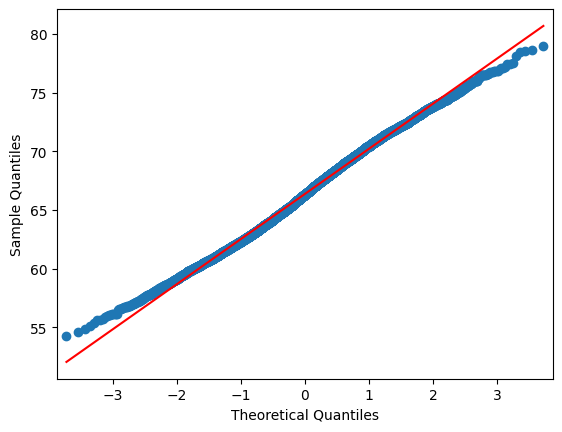

In [ ]:
sm.qqplot(height, line="s")
plt.show()

In [20]:
from scipy.stats import shapiro # Test Gaussian (50 to 200 samples)

In [ ]:
np.random.sample(42)
height_subset = height.sample(100)

In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(height_subset)
print(p_value)

0.16519872844219208


In [ ]:
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

Fail to reject H0
Data is Gaussian


In [21]:
from scipy.stats import levene # Test variance

<Axes: xlabel='Height', ylabel='Count'>

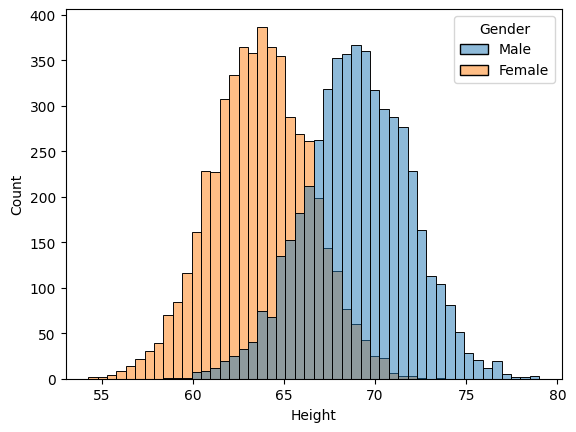

In [ ]:
sns.histplot(data=df_hw, x="Height", hue="Gender")

In [ ]:
height_men = df_hw[df_hw["Gender"]=="Male"]["Height"]
height_women = df_hw[df_hw["Gender"]=="Female"]["Height"]

In [ ]:
height_men.mean()

69.02634590621741

In [ ]:
height_women.mean()

63.70877360342507

In [18]:
cars = [19.9, 15.3, 2.2, 6.8, 34.2, 8.3, 12.0, 7.0, 9.5, 1.1]
buses = [1.8, 24.6, 7.2, 37.0, 7.2, 21.2, 6.5, 23.6]
trucks = [13.3, 23.0, 25.4, 15.3, 57.1, 14.5, 26.0]

In [23]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(cars, buses,trucks)
if p_value < 0.05:
    print("Variances are not equal")
p_value

0.5882526059688644

In [16]:
Saurav = [300, 400, 300, 500, 50]
Naveen = [600, 300, 300, 400]
Radha = [700, 300, 400, 600, 500]

In [24]:
# Conduct the Kruskal-Wallis Test
from scipy import stats
result = stats.kruskal(cars, buses, trucks)

# Print the result
print(result)

KruskalResult(statistic=4.995579016826137, pvalue=0.08226664751547799)
